# Replicate a NYT line chart

We replicate the chart below from this [article](https://www.nytimes.com/interactive/2021/07/27/business/economy/covid-parenting-work-time.html). 

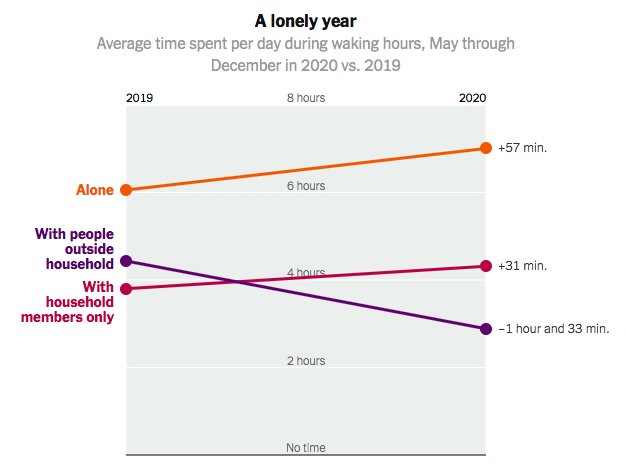

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
!python -V

Python 3.7.12


In [ ]:
mpl.__version__

'3.2.2'

# Define Overall Style Changes  

In [ ]:
# Style Changes

style_changes = {'axes.linewidth': 2,
 'axes.facecolor': (.94, .94, .96),
 'axes.grid.axis': 'y',
 'axes.grid': True,
 'grid.color': 'white',
 'grid.linewidth': 2,
 'axes.spines.bottom': True,
 'axes.spines.top': False,
 'axes.spines.left': False,
 'axes.spines.right': False,
 'axes.edgecolor': 'darkgray',
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'xtick.labeltop':True,
 'xtick.labelbottom':False,
 'ytick.labelleft':False,
 'xtick.color': (.3,.3,.3),
 'text.color': (.3,.3,.3),
 'font.size': 12,
 'lines.marker': 'o',
 'lines.markersize': 8,
 'lines.linewidth': 3,
 'axes.titlesize': 18,
 'axes.titleweight': 'bold', 
 'axes.formatter.useoffset': False # prevent scientific notation
          }

# Title and Subtitle Function

In [ ]:
def title_and_subtitle(title, subtitle = '', pad = 0.01, fig = None, ax = None, title_size = 18, subtitle_size = 11):
    """Add a centered title and subtitle to a plot."""
    if ax == None:
        ax = plt.gca()
    if fig == None:
        fig = plt.gcf()
    
    fig.canvas.draw()
    
    top_of_figure = 1 # axes coords
    # update if there are xticks on the top 
    top_of_ticklabels = ax.get_xticklabels()[0].get_window_extent().transformed(ax.transAxes.inverted()).y1
    top_of_figure = max([top_of_ticklabels,top_of_figure])
        
    # Add subtitle
    if subtitle:
        subt = ax.text(0.5, top_of_figure + pad, subtitle, 
               ha = 'center',
               va = 'bottom',
               size = subtitle_size,
               fontname = 'Liberation Sans',
               transform = ax.transAxes)
        # update top of figure to top of the subtitle
        top_of_figure = subt.get_window_extent().transformed(ax.transAxes.inverted()).y1
        
    # add title
    ax.text(0.5, top_of_figure + pad, title, 
               ha = 'center',
               va = 'bottom',
               size = title_size,
               fontname = 'Liberation Sans',
               fontweight = 'bold',
           transform = ax.transAxes,
           color = 'black')

# Create the data

In [ ]:
data = {2019: [6, 4.3, 3.9],
        2020: [7, 2.7, 4.4]}
df = pd.DataFrame(data = data,
                  index = ['Alone', 
                         'With people outside household', 
                         'With hosehould members only'])

# Make the chart

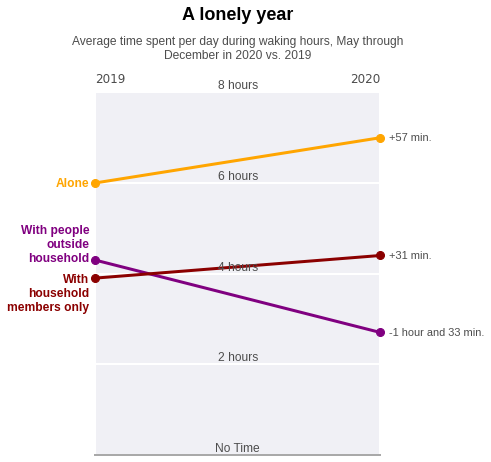

In [ ]:
with plt.style.context(style_changes):
    
    fig = plt.figure(figsize = (7,6.5)) 
    ax = plt.axes(facecolor = (.94, .94, .96))

    # plot the data
    colors = ['orange', 'purple', 'darkred']
    df.T.plot(ax = ax, clip_on = False, color = colors)

    # annotate lines
    right_text_style = dict(ha = 'left', 
                            fontsize = 11, 
                            fontname = 'Liberation Sans',
                            va = 'center')
    left_text_style = dict(ha = 'right',
                      fontsize = 12,
                      fontweight = 'bold',
                      fontname = 'Liberation Sans')

    # alone
    ax.text(2019 - .02, 6, 'Alone', 
        color = colors[0], 
        va = 'center',
        **left_text_style)
    ax.text(2020.03, 7, '+57 min.', 
        **right_text_style)
    
    # Within household
    ax.text(2019 - .02, 4.2, 'With people\noutside\nhousehold', 
            color = colors[1], 
            va = 'bottom',
            **left_text_style)
    ax.text(2020.03, 2.7, '-1 hour and 33 min.',
            **right_text_style)

    # Outside household
    ax.text(2019 - .02, 4, 'With\nhousehold\nmembers only', 
            color = colors[2], 
            va = 'top',
            **left_text_style)
    ax.text(2020.03, 4.4, '+31 min.',
            **right_text_style)
    
    
    # Title and sub
    t = 'A lonely year'
    s = 'Average time spent per day during waking hours, May through\nDecember in 2020 vs. 2019'
    title_and_subtitle(t,s, fig = fig, ax = ax, pad = .03,
                       subtitle_size = 12)
    
    # Clean ticks etc   
    yticks = range(0,9,2)
    ax.set_yticks(yticks)
    ax.set_ylim(0,8)
    # add custom labels for y ticks
    for tick in yticks:
        label = "{} hours".format(tick)
        if tick == 0:
            label = 'No Time' # custom label
        ax.text(2019.5, tick + .01, label,
              va = 'bottom',
              ha = 'center',
              fontname = 'Liberation Sans')
    
    # move x-tick labels to horizontally align
    ax.legend().set_visible(False)
    x_vals = [2019,2020]
    ax.set_xticks(x_vals)
    ax.set_xlim(x_vals)
    xticks = ax.get_xticklabels()
    xticks[0].set_ha('left')
    xticks[-1].set_ha('right')
    
plt.tight_layout()
#plt.savefig('NYT_replica_lonely_year.png', dpi = 1000)